In [1]:
import pandas as pd

In [2]:
import BRADA as brada
print(brada.__dist_name__)
print('Version:', brada.__version__)

BRADA - BR Distribuidora Advanced Analytics Framework
Version: 0.0.1


In [3]:
pequim = pd.read_csv('datasets/BeijingPM20100101_20151231.csv')
pequim.dropna(inplace=True)

pequim['date'] = pequim['year'].astype(str) + '-' + pequim['month'].astype(str) + '-' + pequim['day'].astype(str)
pequim.drop_duplicates(subset='date', inplace=True)
pequim['date'] = pd.to_datetime(pequim['date'])
pequim.sort_values('date', inplace=True)
pequim.set_index('date', inplace=True)
pequim.index = pd.DatetimeIndex(pequim.index).to_period('D')

pequim.columns

Index(['No', 'year', 'month', 'day', 'hour', 'season', 'PM_Dongsi',
       'PM_Dongsihuan', 'PM_Nongzhanguan', 'PM_US Post', 'DEWP', 'HUMI',
       'PRES', 'TEMP', 'cbwd', 'Iws', 'precipitation', 'Iprec'],
      dtype='object')

In [4]:
black_friday = pd.read_csv('datasets/BlackFriday.csv')
black_friday.columns                           

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [5]:
fb = pd.read_csv('datasets/FB.csv')
fb.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [6]:
fb['Date'] = pd.to_datetime(fb['Date'])
fb = fb.set_index('Date')

In [20]:
X_train, y_train, X_test, y_test = brada.train_test_split.generic_train_test_split(df=fb,
    sep_type='regression',
    target_col='Volume',
    features_cols=None,
    cat_cont_var_bins=3,
    test_size=0.2,
    random_state=10,)

0    234
1     26
2      3
Name: categorical_target, dtype: int64


In [36]:
X1_train, y1_train = resampler_regression(X_train, y_train, 'Volume', bins=5, balanced_binning=False)

INFO: Class 3 has been merged into Class 2 due to low number of samples
INFO: Class 4 has been merged into Class 2 due to low number of samples

Class Distribution:
-------------------
0: 81
1: 101
2: 28



array([[<AxesSubplot:title={'center':'Volume'}>]], dtype=object)

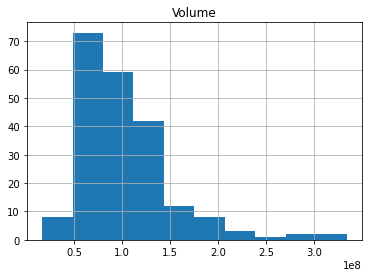

In [37]:
y_train.hist()

<AxesSubplot:>

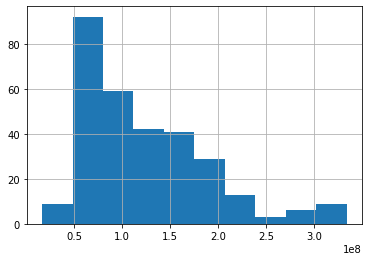

In [38]:
y1_train.hist()

In [14]:
def resampler_regression(X_train, y_train, target, bins=7,
                         balanced_binning=False, random_state=10):

    import pandas as pd
    from reg_resampler import resampler
    from imblearn.over_sampling import SMOTE

    base = pd.concat([X_train, y_train], axis=1)

    rs = resampler()

    Y_classes = rs.fit(base, target=target, bins=bins,
                       balanced_binning=balanced_binning)

    smote = SMOTE(random_state=random_state)

    X1_train, y_train = rs.resample(smote, base, Y_classes)

    return X1_train, y_train

In [39]:

from reg_resampler import resampler
from imblearn.over_sampling import SMOTE

rs = resampler()
Y_classes = rs.fit(base, target=target, bins=bins,
                       balanced_binning=balanced_binning)

smote = SMOTE(random_state=random_state)


NameError: name 'base' is not defined

In [ ]:
df_temp = continuous_to_categorical(fb, bins=10)

In [ ]:
df_temp['Close_categorical'].value_counts()

In [ ]:
(94*0.6*5.42)-600

In [ ]:
from mlxtend.evaluate import bias_variance_decomp

In [ ]:
bias_variance_decomp()